K-means is an unsupervised clustering algorithm that aims to group data points into K clusters based on their similarity. It iteratively assigns data points to the nearest centroid and **updates the centroids **until convergence,it use euclidean distance formula for calculation.

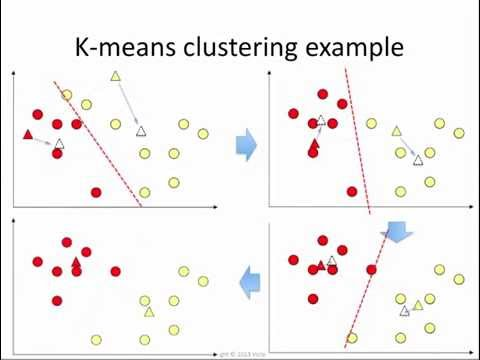

## Euclidean Distance
Euclidean distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)

euclidean_distance.svg

In [ ]:
from sklearn.datasets  import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X=pd.read_csv('/content/')

**FEATURE SCALING**

Min-Max scale
X_scaled = (X - X_min) / (X_max - X_min)

Standard scale
X_scaled = (X - mean) / standard_deviation



**OUTLIER REMOVAL**

Method for outlier removal is the z-score method.To remove outliers from a dataset, you can use a general function that identifies and eliminates observations that are considered outliers.

In [ ]:
def remove_outliers(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    mask = np.abs(z_scores) < threshold
    cleaned_data = data[mask]
    return cleaned_data


In [ ]:
# Generating sample data from make_blobs.
# Dont run this command if you have your X data.
X,y=make_blobs(n_samples=500,
               n_features=2,
               centers=5,
               cluster_std=1.299,
               center_box=(-10.0,10.0),
               shuffle=True,
               )
range_n_clusters=[2,3,4,5,6,7]

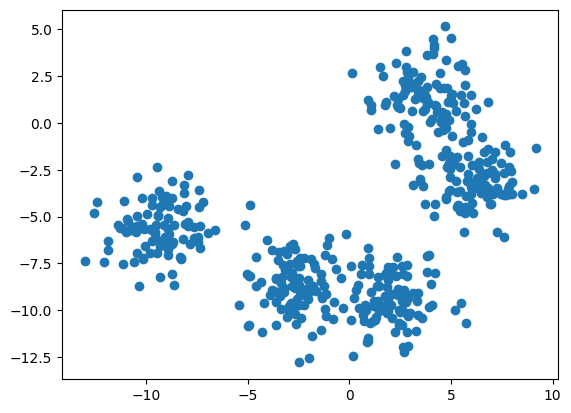

In [ ]:
plt.scatter(X[:,0],X[:,-1])

The elbow method is commonly used to determine the optimal value of 'k' in k-means clustering by examining the plot of the within-cluster sum of squares (WCSS) against different values of 'k'

Elow curve ploted for finding the k value, graph k values on x-axis and wscc on y axis.


In the elbow method, we analyze the curve to identify the point where there is a sharp change. Once we find this point of significant change, we observe the corresponding value on the x-axis to determine the suitable K value for the K-means algorithm.

 WCSS :
 Within-Cluster Sum of Squares (WCSS): For each 'k,' calculate the WCSS, which is the sum of squared distances between each data point and its centroid within a cluster. It represents the compactness of the clusters. The WCSS can be obtained as the sum of the squared distances for each data point from its assigned cluster center.

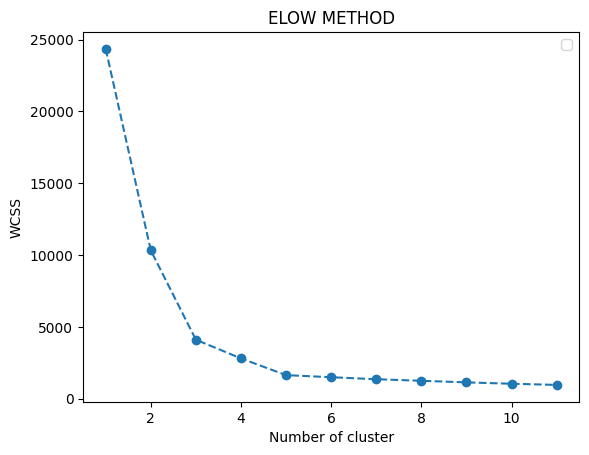

In [ ]:
wcss=[]
for i in range(1,12):
  km=KMeans(n_clusters=i,init='k-means++',random_state=0) # k means ++ initialise centroids far way from
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1,12),wcss,linestyle='--')
plt.scatter(range(1,12),wcss)
plt.title('ELOW METHOD')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.legend()
plt.show()

The silhouette score is a metric used for validating a model's performance.
You can then analyze the silhouette scores to determine the optimal number of clusters

In [ ]:

#  X is your data
# Define a range of cluster numbers to evaluate
min_clusters = 2 #@param {type :"integer"}
max_clusters = 10  #@param {type :"integer"}

# Perform agglomerative clustering for different numbers of clusters.
# Iterate over the range of cluster numbers from min_clusters to max_clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create an instance of KMeans with the current number of clusters
    clustering = KMeans(n_clusters=n_clusters)

    # Fit the clustering model and obtain the predicted labels for the data points
    labels = clustering.fit_predict(X)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, labels)

    # Print the results, indicating the number of clusters and its average silhouette score
    print(f"For {n_clusters} clusters, the average silhouette score is: {silhouette_avg}")

    clustering = KMeans(n_clusters=n_clusters, init='k-means++')

    # Fit the clustering model and obtain the predicted labels for the data points
    labels = clustering.fit_predict(X)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, labels)

    # Print the results, indicating the number of clusters and its average silhouette score
    print(f"For kmeans_plusp{n_clusters} clusters, the average silhouette score is: {silhouette_avg}")

For 2 clusters, the average silhouette score is: 0.5385470132467317
For kmeans_plusp2 clusters, the average silhouette score is: 0.5385470132467317
For 3 clusters, the average silhouette score is: 0.612988285078861
For kmeans_plusp3 clusters, the average silhouette score is: 0.612988285078861
For 4 clusters, the average silhouette score is: 0.5716087634491673
For kmeans_plusp4 clusters, the average silhouette score is: 0.5716087634491673
For 5 clusters, the average silhouette score is: 0.5762209905075827
For kmeans_plusp5 clusters, the average silhouette score is: 0.5762209905075827
For 6 clusters, the average silhouette score is: 0.5136570812720674
For kmeans_plusp6 clusters, the average silhouette score is: 0.5136496407654333
For 7 clusters, the average silhouette score is: 0.44745758941781466
For kmeans_plusp7 clusters, the average silhouette score is: 0.44366786228139815
For 8 clusters, the average silhouette score is: 0.3953622005297333
For kmeans_plusp8 clusters, the average silh

When examining a graph, it is recommended to choose a higher number of clusters that demonstrate positive or neutral shifts, rather than relying solely on the silhouette score.

Vertical dot line is a Silhoutte score.
When analyzing a graph, it is advisable to select a larger number of clusters that do not exhibit negative shift.
To determine the effectiveness of each cluster, we need to assess if any of them are experiencing negative outcomes. If none of the clusters exhibit negative indicators, then we can conclude that this particular number of clusters is performing satisfactorily.

For n_clusters = 2 The average silhouette_score is : 0.5385470132467317
For n_clusters = 3 The average silhouette_score is : 0.6139507406255152
For n_clusters = 4 The average silhouette_score is : 0.5716087634491673
For n_clusters = 5 The average silhouette_score is : 0.5762209905075827
For n_clusters = 6 The average silhouette_score is : 0.523049994435014
For n_clusters = 7 The average silhouette_score is : 0.462156836569574


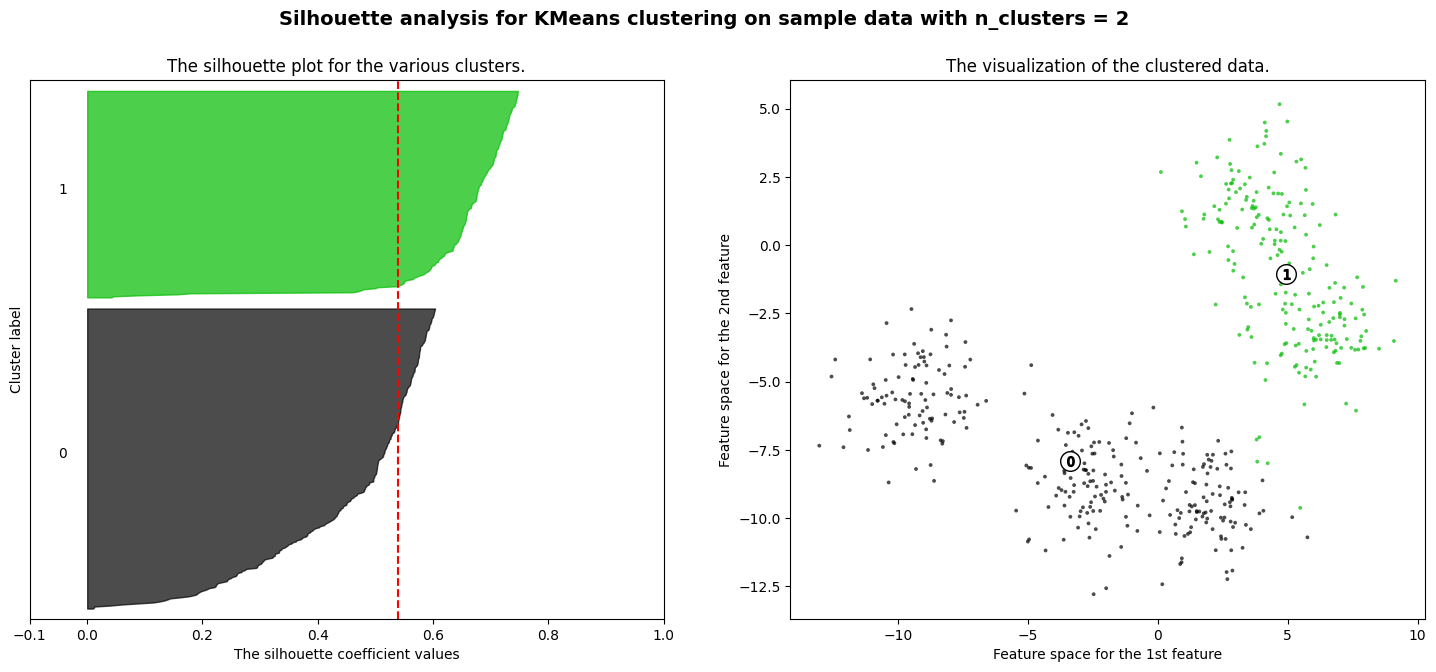

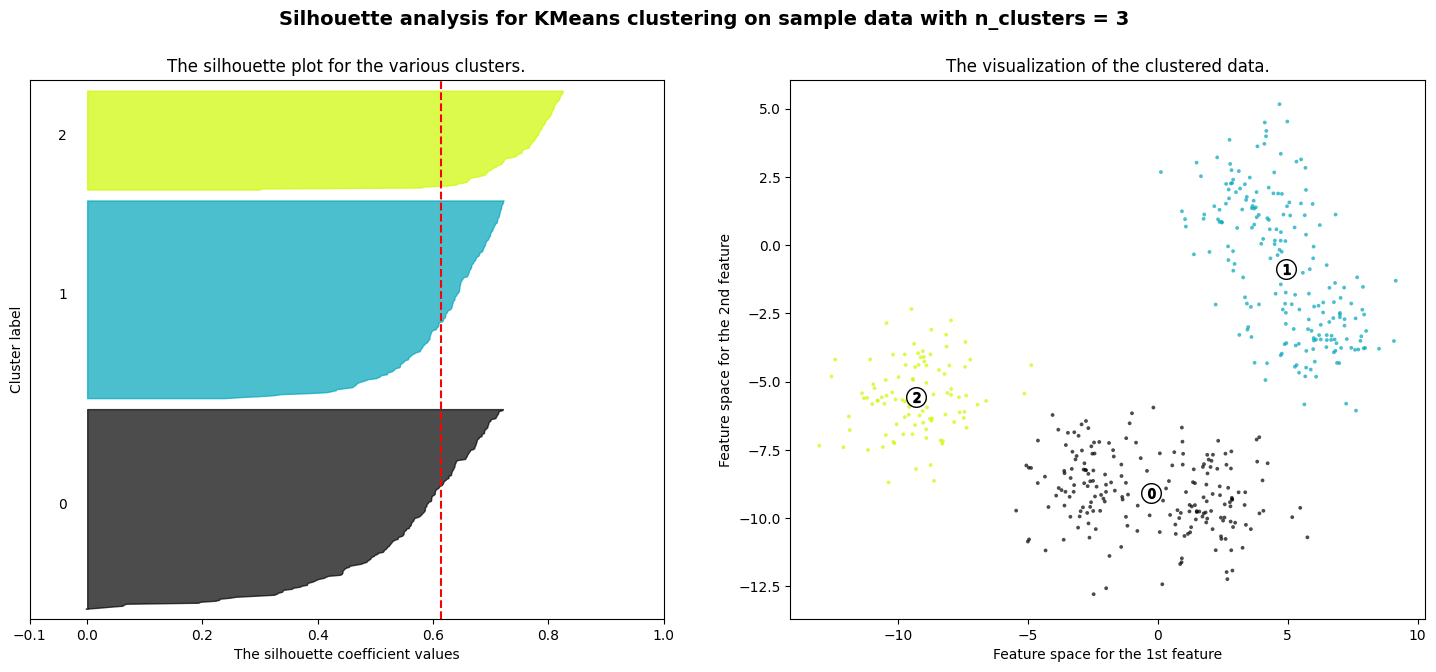

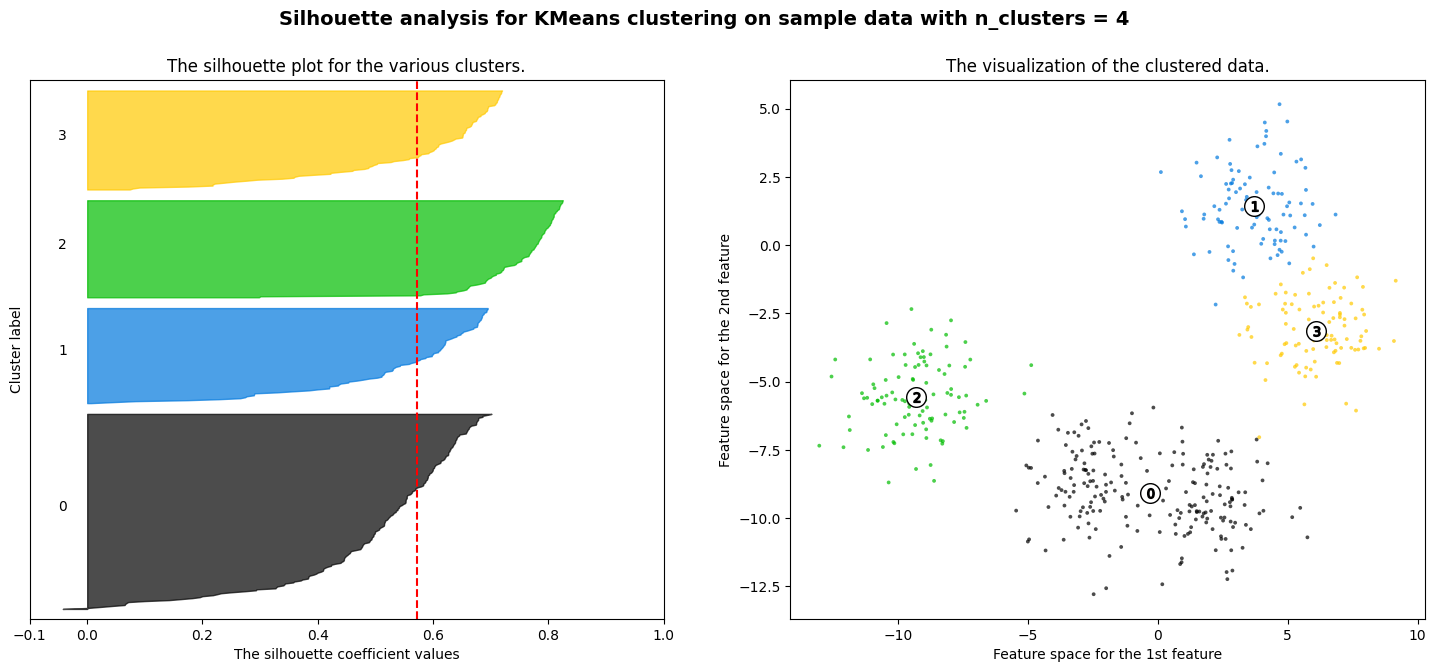

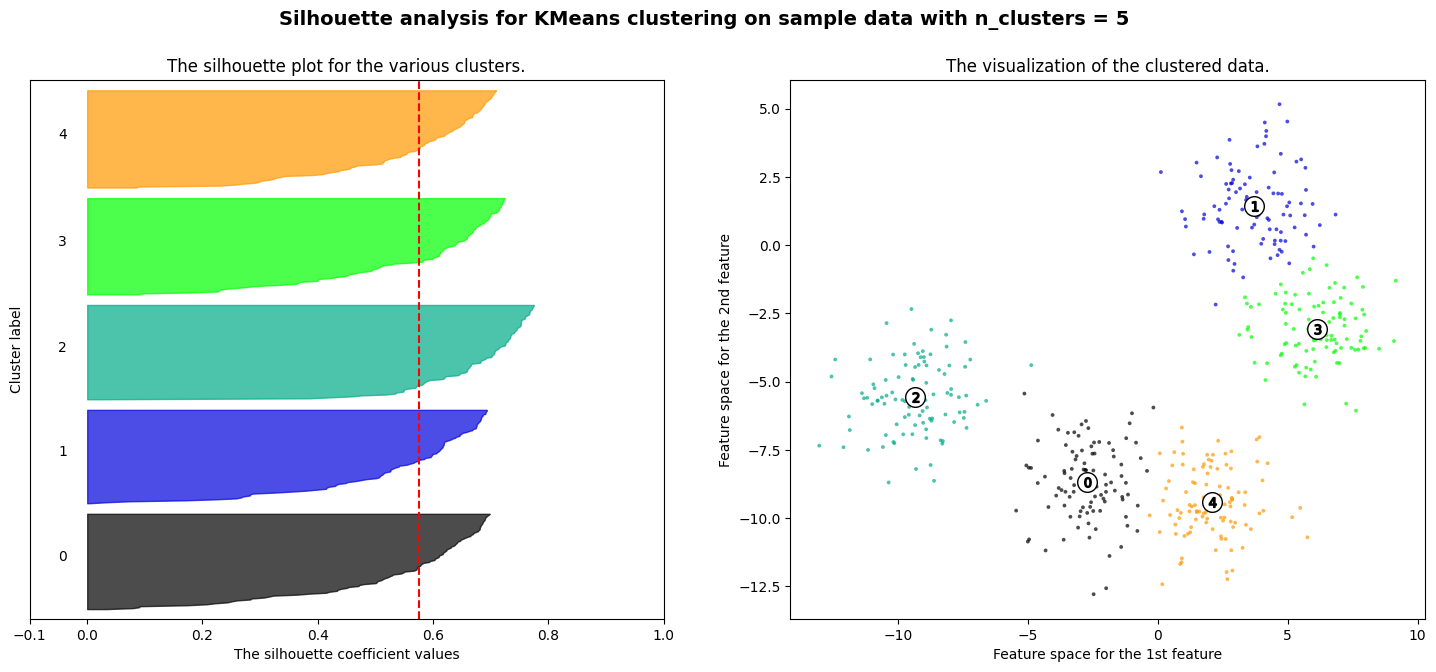

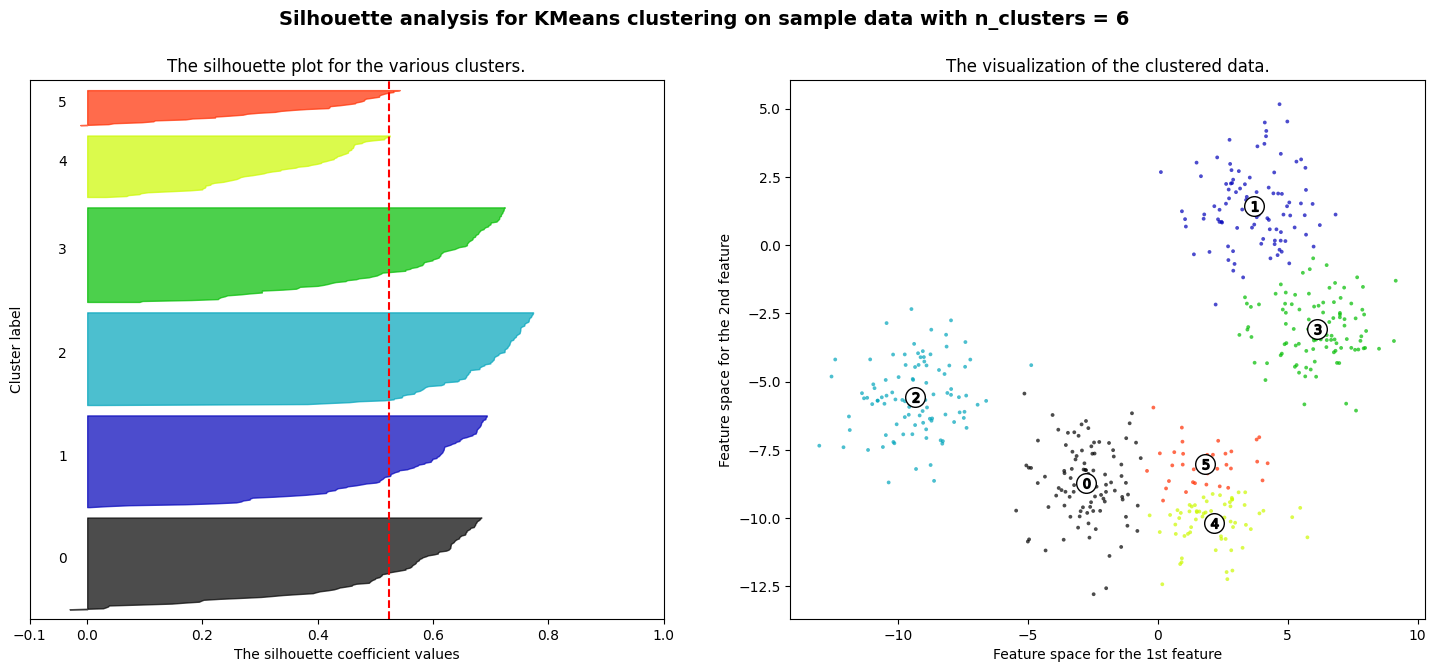

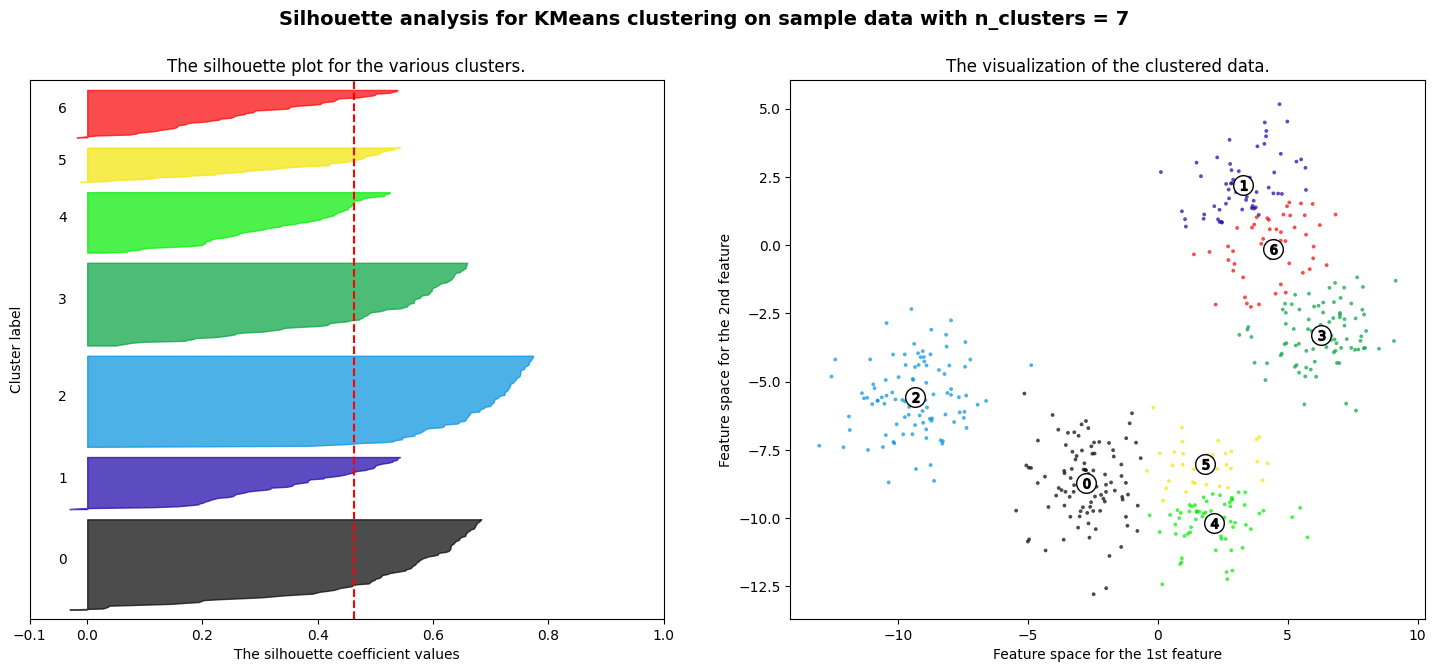

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7]
 # In this Kmeans is used.
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Hyper-parameters of KMeans

**n_init**  : Number of times the k-means algorithm is run with different centroid seeds.

In [ ]:
n_init =40  #@param {type :"integer"}
for n in  range(2,n_init):
    # Create a KMeans instance with the current n_init value
    clusterer = KMeans(n_clusters=n_clusters, n_init=n, random_state=10)

    # Fit the model and obtain the cluster labels
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the current clustering result
    score = silhouette_score(X, cluster_labels)

    # Print the silhouette score for the current n_init value
    print(f"Silhouette score for n_init={n}: {score}")

silhouette score for n_init :1 0.5762209905075827
silhouette score for n_init :2 0.5762209905075827
silhouette score for n_init :3 0.5762209905075827
silhouette score for n_init :4 0.5762209905075827
silhouette score for n_init :5 0.5762209905075827
silhouette score for n_init :6 0.5762209905075827
silhouette score for n_init :7 0.5762209905075827
silhouette score for n_init :8 0.5762209905075827
silhouette score for n_init :9 0.5762209905075827
silhouette score for n_init :10 0.5762209905075827
silhouette score for n_init :11 0.5762209905075827
silhouette score for n_init :12 0.5762209905075827
silhouette score for n_init :13 0.5762209905075827
silhouette score for n_init :14 0.5762209905075827
silhouette score for n_init :15 0.5762209905075827
silhouette score for n_init :16 0.5762209905075827
silhouette score for n_init :17 0.5762209905075827
silhouette score for n_init :18 0.5762209905075827
silhouette score for n_init :19 0.5762209905075827
silhouette score for n_init :20 0.576220

**max_iter** :Maximum number of iterations of the k-means algorithm for a single run.

In [ ]:
max_iter =400  #@param {type :"integer"}
for n in range(300,max_iter,10): # default =300
  clusterer = KMeans(n_clusters=5, n_init='auto', random_state=10,max_iter=n)
  cluster_labels = clusterer.fit_predict(X)

  print(f'silhouette score for max_iter :{n}',silhouette_score(X,cluster_labels))

silhouette score for max_iter :300 0.5762209905075827
silhouette score for max_iter :310 0.5762209905075827
silhouette score for max_iter :320 0.5762209905075827
silhouette score for max_iter :330 0.5762209905075827
silhouette score for max_iter :340 0.5762209905075827
silhouette score for max_iter :350 0.5762209905075827
silhouette score for max_iter :360 0.5762209905075827
silhouette score for max_iter :370 0.5762209905075827
silhouette score for max_iter :380 0.5762209905075827
silhouette score for max_iter :390 0.5762209905075827


**algorithm** : {“lloyd”, “elkan”, “auto”, “full”}

The classical EM-style algorithm is "lloyd".
The "elkan" variation can be more efficient on some datasets with well-defined clusters.


In [ ]:
clusterer = KMeans(n_clusters=5, n_init='auto', random_state=10, algorithm='full')
cluster_labels = clusterer.fit_predict(X)

In [ ]:
silhouette_score(X,cluster_labels)

0.5762209905075827